# ESCOPO DO PROJETO
Uma empresa de locação de veículos deseja desenvolver um sistema para gerenciar o processo de locação. Para isso, será necessário realizar o cadastro dos veículos, dos clientes e gerenciar a ação de locação.

Os veículos são designados pela placa, modelo, categoria, sendo elas básico, intermediário e luxo, e seu estado atual, podendo estar disponível ou locado.

Os clientes são cadastrados pelo nome e sobrenome, CPF e email, além de se relacionar ao veículo locado pela placa.

O sistema deve realizar a locação do veículo, verificando quais estão disponíveis e alocando-o ao cliente. No processo de devolução, devem ser informadas quantas diárias foram utilizadas, para que seja emitida a nota para pagamento, constando o valor total do serviço.

## INICIO DO DESENVOLVIMENTO
 1-	Crie um diagrama que descreva a estrutura do sistema, descrevendo a estrutura das entidades VEÍCULO e CLIENTE, bem como a correlação entre elas.

 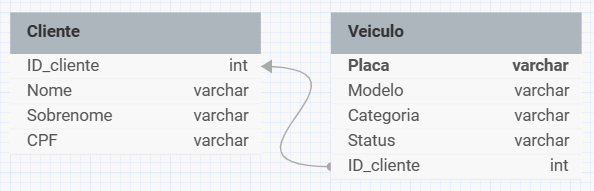

2- Crie uma função que realize o cadastro do veículo, recebendo com passagem uma lista com o banco de dados dos veículos e retorne essa mesma lista com o novo valor de registro atualizado.

O campo de disponibilidade deve ter valor -1 para quando o veículo estiver disponível e o índice do cliente que o locou, caso esteja indisponível.


In [67]:
def cadastrar_veiculo(lista_veiculos, placa=None, modelo=None, categoria=None, id_cliente=None):
    if placa is None:
        placa = input("\nDigite a placa do veículo: ").upper()

    # Verifica se o veículo já existe na lista pelo número da placa
    for veiculo in lista_veiculos:
        if veiculo['placa'] == placa:
            print("Veículo já cadastrado. Dados atuais:")
            print(veiculo)
            return lista_veiculos

    # Início da entrada de um novo registro
    if modelo is None:
        modelo = input("Digite o modelo do veículo: ").title() # Padronização para os campos
    if categoria is None:
        categoria = input("Digite a categoria do veículo (Básico, Intermediário, Luxo): ").title()

    # Status do veículo
    while True:
        if id_cliente is None:
            status_input = input("O veículo está disponível (S/N)? ").upper()
            if status_input == 'S':
                status = -1
                break
            elif status_input == 'N':
                id_cliente = input("Digite o ID do cliente que alugou o veículo: ")
                status = 1
                break
            else:
                print("Opção inválida =(. Por favor, digite 'S' para sim ou 'N' para não.")
        else:
            status = id_cliente
            break

    novo_veiculo = {
        'placa': placa,
        'modelo': modelo,
        'categoria': categoria,
        'status': status,
        'id_cliente': id_cliente
    }
    lista_veiculos.append(novo_veiculo)
    return lista_veiculos

# Banco de Dados de Veículos
lista_veiculos = []
lista_veiculos = cadastrar_veiculo(lista_veiculos, 'ABC1234', 'Chevrolet Equinox', 'Intermediário', -1)

# Loop para continuar cadastrando Veículos
while True:
    cadastrar = input("\nDeseja cadastrar um novo veículo (S/N)? ").upper()
    if cadastrar == 'S':
        lista_veiculos = cadastrar_veiculo(lista_veiculos)
    elif cadastrar == 'N':
        break
    else:
        print("Opção inválida. Por favor, digite 'S' para sim ou 'N' para não.")

print("Lista de veículos cadastrados:")
print(lista_veiculos)



Deseja cadastrar um novo veículo (S/N)? s

Digite a placa do veículo: DEF5678
Digite o modelo do veículo: Volkswagen T-Cross
Digite a categoria do veículo (Básico, Intermediário, Luxo): Intermediário
O veículo está disponível (S/N)? s

Deseja cadastrar um novo veículo (S/N)? s

Digite a placa do veículo: GHI9012
Digite o modelo do veículo: Hyundai Hb20
Digite a categoria do veículo (Básico, Intermediário, Luxo): Básico
O veículo está disponível (S/N)? s

Deseja cadastrar um novo veículo (S/N)? s

Digite a placa do veículo: JKL3456
Digite o modelo do veículo: Ford Fiesta
Digite a categoria do veículo (Básico, Intermediário, Luxo): Básico
O veículo está disponível (S/N)? s

Deseja cadastrar um novo veículo (S/N)? s

Digite a placa do veículo: MNO7890
Digite o modelo do veículo: Porsche 911
Digite a categoria do veículo (Básico, Intermediário, Luxo): Luxo
O veículo está disponível (S/N)? s

Deseja cadastrar um novo veículo (S/N)? s

Digite a placa do veículo: VYX3512
Digite o modelo do v

3- Crie uma função que realize o cadastro do cliente, recebendo como passagem uma lista com o banco de dados dos clientes e retorne essa mesma lista com o novo valor de registro atualizado.

 O nome do cliente deve conter apenas Nome e Sobrenome, devendo ser armazenado em uma lista com duas posições.

In [68]:
def cadastrar_cliente(lista_clientes, id_cliente, nome, sobrenome, cpf, email):
    # Verifica se o ID passado já existe na lista de clientes
    for cliente in lista_clientes:
        if cliente['id_cliente'] == id_cliente:
            print("Cliente já cadastrado. ID existente:", id_cliente)
            return lista_clientes

    # Cria um novo cliente com o ID fornecido
    novo_cliente = {
        'id_cliente': id_cliente,
        'nome': nome,
        'sobrenome': sobrenome,
        'cpf': cpf,
        'email': email
    }
    lista_clientes.append(novo_cliente)
    return lista_clientes

# Banco de dados de Clientes
lista_clientes = []

# Loop para continuar cadastrando clientes
while True:
    cadastrar = input("\nDeseja cadastrar um novo cliente (S/N)? ").upper()
    if cadastrar == 'S':
        id_cliente = len(lista_clientes) + 1  # Incrementa o ID

        nome_completo = input("Digite o nome completo do cliente (Nome e Sobrenome): ").title() # Padronização para os campos
        nome_sobrenome = nome_completo.split()
        while len(nome_sobrenome) != 2:
            print("Formato inválido. O nome do cliente deve conter apenas Nome e Sobrenome.")
            nome_completo = input("Digite o nome completo do cliente (Nome e Sobrenome): ").title()
            nome_sobrenome = nome_completo.split()

        cpf = input("Digite o CPF do cliente: ")
        email = input("Digite o e-mail do cliente: ")
        lista_clientes = cadastrar_cliente(lista_clientes, id_cliente, nome_sobrenome[0], nome_sobrenome[1], cpf, email)

    elif cadastrar == 'N':
        break
    else:
        print("Opção inválida. Por favor, digite 'S' para sim ou 'N' para não.")

print("Lista de clientes cadastrados:")
print(lista_clientes)


Deseja cadastrar um novo cliente (S/N)? s
Digite o nome completo do cliente (Nome e Sobrenome): Victoria Cruz
Digite o CPF do cliente: 12053722851
Digite o e-mail do cliente: vic_cruz@gmail.com

Deseja cadastrar um novo cliente (S/N)? Matheus Cruz
Opção inválida. Por favor, digite 'S' para sim ou 'N' para não.

Deseja cadastrar um novo cliente (S/N)? s
Digite o nome completo do cliente (Nome e Sobrenome): Matheus Cruz
Digite o CPF do cliente: 13061966946
Digite o e-mail do cliente: theuxx@hotmail.com

Deseja cadastrar um novo cliente (S/N)? s
Digite o nome completo do cliente (Nome e Sobrenome): Jessica Gular
Digite o CPF do cliente: 85296374100
Digite o e-mail do cliente: jess_g@outlook.com

Deseja cadastrar um novo cliente (S/N)? n
Lista de clientes cadastrados:
[{'id_cliente': 1, 'nome': 'Victoria', 'sobrenome': 'Cruz', 'cpf': '12053722851', 'email': 'vic_cruz@gmail.com'}, {'id_cliente': 2, 'nome': 'Matheus', 'sobrenome': 'Cruz', 'cpf': '13061966946', 'email': 'theuxx@hotmail.com'}

4- Crie uma função que realize a busca de um veículo a partir da sua placa.
Ela deve receber como passagem a lista contendo o banco de dados de veículos e a placa, e retorne uma lista contendo o índice do veículo desejado.

In [69]:
def buscar_veiculo_por_placa(lista_veiculos, placa):
    indices_encontrados = []
    for indice, veiculo in enumerate(lista_veiculos):
        if veiculo['placa'] == placa:
            indices_encontrados.append(indice)
    return indices_encontrados

placa_desejada = input("Digite a placa do veículo que deseja buscar: ").upper()
indices_encontrados = buscar_veiculo_por_placa(lista_veiculos, placa_desejada)

if indices_encontrados:
    print("Veículo com a placa -->", placa_desejada, "<-- encontrado no índice:", indices_encontrados)
else:
    print("Nenhum veículo encontrado com a placa:", placa_desejada)


Digite a placa do veículo que deseja buscar: JKL3456
Veículo com a placa --> JKL3456 <-- encontrado no índice: [3]


5-	Crie uma função que realize a busca por veículos, tendo como base o estado da locação.

 Ela deve receber como parâmetros de entrada a lista contendo o banco de dados dos veículos e um parâmetro booleano, que selecionará se a lista retornada será dos veículos disponíveis ou indisponíveis.

 O valor padrão para esse parâmetro deve ser disponivel=True. O retorno da função deve uma lista contendo os índices de todos os veículos selecionados.

In [70]:
def listar_veiculos_por_status(lista_veiculos, disponivel=True):
    indices_encontrados = []

    for indice, veiculo in enumerate(lista_veiculos):
        if disponivel and veiculo['status'] == -1:
            indices_encontrados.append(indice)
        elif not disponivel and veiculo['status'] != -1:
            indices_encontrados.append(indice)
    return indices_encontrados

disponivel = input("Deseja buscar veículos disponíveis (S/N)? ").upper()
if disponivel == 'S':
    disponivel = True
else:
    disponivel = False

indices_encontrados = listar_veiculos_por_status(lista_veiculos, disponivel)

if indices_encontrados:
    if disponivel:
        print("Os veículos disponíveis estão nos índices:", indices_encontrados)
    else:
        print("Os veículos indisponíveis estão nos índices:", indices_encontrados)
else:
    if disponivel:
        print("Não hé nenhum veículo disponível.")
    else:
        print("Não há nenhum veículo indisponível! Todos estão alugados.")


Deseja buscar veículos disponíveis (S/N)? s
Os veículos disponíveis estão nos índices: [0, 1, 2, 3, 4, 5]


6-	Crie uma função que receba como parâmetros a lista contendo o banco de dados dos veículos e uma lista contendo índices de veículo e realize a impressão desses dados.

In [91]:
def listar_veiculos(lista_veiculos):
    for indice, veiculo in enumerate(lista_veiculos):
        print(f"\nVeículo {indice}:")
        print("Placa:", veiculo['placa'])
        print("Modelo:", veiculo['modelo'])
        print("Categoria:", veiculo['categoria'])
        if veiculo['status'] == -1:
            print("Status: Disponível")
        else:
            print("Status: Locado para o cliente", veiculo['id_cliente'])

listar_veiculos(lista_veiculos)


Veículo 0:
Placa: ABC1234
Modelo: Chevrolet Equinox
Categoria: Intermediário
Status: Disponível

Veículo 1:
Placa: DEF5678
Modelo: Volkswagen T-Cross
Categoria: Intermediário
Status: Disponível

Veículo 2:
Placa: GHI9012
Modelo: Hyundai Hb20
Categoria: Básico
Status: Disponível

Veículo 3:
Placa: JKL3456
Modelo: Ford Fiesta
Categoria: Básico
Status: Disponível

Veículo 4:
Placa: MNO7890
Modelo: Porsche 911
Categoria: Luxo
Status: Disponível

Veículo 5:
Placa: VYX3512
Modelo: Volkswagen Amarok
Categoria: Intermediário
Status: Disponível

Veículo 6:
Placa: ZYW8469
Modelo: Ferrari 812 Gts
Categoria: Luxo
Status: Locado para o cliente 1

Veículo 7:
Placa: ABC5678
Modelo: Toyota Corolla
Categoria: Intermediário
Status: Disponível

Veículo 8:
Placa: DEF9012
Modelo: Honda Civic
Categoria: Intermediário
Status: Disponível

Veículo 9:
Placa: GHI2345
Modelo: Nissan Versa
Categoria: Básico
Status: Disponível

Veículo 10:
Placa: JKL6789
Modelo: Renault Kwid
Categoria: Básico
Status: Disponível

V

7-	Crie uma função que faça a busca por cliente a partir do seu o nome ou o sobrenome.

Deve receber como parâmetros a lista contendo o banco de dados dos clientes, o nome que deve ser localizado e um parâmetro booleano que informe se a busca deve ser realizada pelo nome ou sobrenome.

O retorno deve ser uma lista contendo todos os índices onde houveram ocorrência do nome/sobrenome desejados.

In [72]:
def consultar_cliente(lista_clientes, nome_ou_sobrenome, buscar_por_nome=True):
    indices_encontrados = []
    for indice, cliente in enumerate(lista_clientes):
        if buscar_por_nome:
            if cliente['nome'] == nome_ou_sobrenome:
                indices_encontrados.append(indice)
        else:
            if cliente['sobrenome'] == nome_ou_sobrenome:
                indices_encontrados.append(indice)
    return indices_encontrados

nome_ou_sobrenome = input("Digite o nome ou sobrenome do cliente que deseja buscar: ").title()
buscar_por_nome = input("Deseja buscar pelo nome(S) ou por sobrenome(N)? ").upper()
if buscar_por_nome == 'S':
    buscar_por_nome = True
else:
    buscar_por_nome = False

indices_encontrados = consultar_cliente(lista_clientes, nome_ou_sobrenome, buscar_por_nome)

if indices_encontrados:
    print(f"Cliente(s) com {'nome -->' if buscar_por_nome else 'sobrenome -->'} {nome_ou_sobrenome} encontrado(s) nos índices:", indices_encontrados)
else:
    print(f"Nenhum cliente encontrado com {'nome -->' if buscar_por_nome else 'sobrenome -->'} {nome_ou_sobrenome}.")

Digite o nome ou sobrenome do cliente que deseja buscar: cruz
Deseja buscar pelo nome(S) ou por sobrenoe(N)? n
Cliente(s) com sobrenome --> Cruz encontrado(s) nos índices: [0, 1]


8-	Crie uma função que imprima os dados de clientes. Ela receberá como parâmetro a lista contendo o banco de dados do cliente e uma lista contendo os índices de clientes e imprimirá os dados dos clientes listados.

In [92]:
def listar_clientes(lista_clientes):
    for indice, cliente in enumerate(lista_clientes):
        print(f"\nCliente {indice}:")
        print("ID:", cliente['id_cliente'])
        print("Nome:", cliente['nome'])
        print("Sobrenome:", cliente['sobrenome'])
        print("CPF:", cliente['cpf'])
        print("E-mail:", cliente['email'])


listar_clientes(lista_clientes)


Cliente 0:
ID: 1
Nome: Victoria
Sobrenome: Cruz
CPF: 12053722851
E-mail: vic_cruz@gmail.com

Cliente 1:
ID: 2
Nome: Matheus
Sobrenome: Cruz
CPF: 13061966946
E-mail: theuxx@hotmail.com

Cliente 2:
ID: 3
Nome: Jessica
Sobrenome: Gular
CPF: 85296374100
E-mail: jess_g@outlook.com

Cliente 3:
ID: 4
Nome: Gutto
Sobrenome: Guimarães
CPF: 75342186900
E-mail: guttooo@yahoo.com

Cliente 4:
ID: 5
Nome: Luiza
Sobrenome: Costa
CPF: 95148763212
E-mail: lui_cst@outlook.com

Cliente 5:
ID: 6
Nome: Eva
Sobrenome: Mello
CPF: 82469371038
E-mail: eva_m@gmail.com


9-	Crie uma função que realize o aluguel do veículo. Ela deve receber como parâmetros as listas contendo os bancos de dados de veículos e clientes e retorná-los atualizados.

 A função deve solicitar a placa do veículo e avaliar se ele está disponível para locação. Caso não esteja, deve oferecer ao usuário a opção de inserir uma nova placa ou sair da opção.

 Caso o veículo esteja disponível, ela deve exibir os dados do veículo e pedir que o usuário confirme que está correto. Caso negativo, ofereça a opção de inserir uma nova placa ou sair.

 Se estiver correto, solicite o ID do cliente, faça a mesma avaliação e ofereça as mesmas opções apresentadas no caso dos veículos.

 Se tudo estiver correto, os campos de ‘disponibilidade do veículo’ e de ‘veículo locado’ devem ser atualizados nas respectivas bases de dados e um sumário da operação exibido na tela.

 A função deve retornar a duas listas atualizadas.

In [77]:
def buscar_cliente_por_id(lista_clientes, id_cliente):
    indices_encontrados = []
    for indice, cliente in enumerate(lista_clientes):
        if cliente['id_cliente'] == id_cliente:
            indices_encontrados.append(indice)
    return indices_encontrados

def alugar_veiculo(lista_veiculos, lista_clientes):
    while True:
        placa = input("Digite a placa do veículo que deseja alugar: ").upper()

        # Verifica se a placa existe na lista de veículos
        veiculos_encontrados = buscar_veiculo_por_placa(lista_veiculos, placa)
        if not veiculos_encontrados:
            print("Veículo não encontrado.")
            continuar = input("Deseja inserir uma nova placa (S/N)? ").upper()
            if continuar != 'S':
                return lista_veiculos, lista_clientes
            else:
                continue

        indice_veiculo = veiculos_encontrados[0]
        veiculo = lista_veiculos[indice_veiculo]
        if veiculo['status'] != -1:
            print("O veículo não está disponível para locação.")
            continuar = input("Deseja inserir uma nova placa (S/N)? ").upper()
            if continuar != 'S':
                return lista_veiculos, lista_clientes
            else:
                continue

        # Exibe os dados do veículo e pede confirmação
        print("Veículo encontrado:")
        listar_veiculos([veiculo])
        confirmar = input("Confirma o aluguel deste veículo (S/N)? ").upper()
        if confirmar != 'S':
            continuar = input("Deseja inserir uma nova placa (S/N)? ").upper()
            if continuar != 'S':
                return lista_veiculos, lista_clientes
            else:
                continue

        # Solicita o ID do cliente
        tentativas = 0
        while True:
            id_cliente = input("Digite o ID do cliente que está alugando o veículo: ")
            id_cliente = int(id_cliente)
            clientes_encontrados = buscar_cliente_por_id(lista_clientes, id_cliente)
            if not clientes_encontrados:
                print("Cliente não encontrado.")
                continuar = input("Deseja inserir um novo ID (S/N)? ").upper()
                if continuar != 'S':
                    break
            else:
                # Exibe os dados do cliente e pede confirmação
                print("Cliente encontrado:")
                listar_clientes([lista_clientes[clientes_encontrados[0]]])
                confirmar_cliente = input("Confirma o aluguel para este cliente (S/N)? ").upper()
                if confirmar_cliente == 'S':
                    # Atualiza o status do veículo e o ID do cliente que alugou o carro
                    lista_veiculos[indice_veiculo]['status'] = id_cliente
                    lista_veiculos[indice_veiculo]['id_cliente'] = id_cliente

                    # Atualiza a lista de clientes
                    for cliente in lista_clientes:
                        if cliente['id_cliente'] == id_cliente:
                            cliente['veiculo_locado'] = placa

                    print("Veículo alugado com sucesso para o cliente ID:", id_cliente)
                    return lista_veiculos, lista_clientes
                else:
                    tentativas += 1
                    if tentativas >= 2:
                        voltar_inicio = input("Confirmar o aluguel para este cliente (S) ou voltar para o início (V)? ").upper()
                        if voltar_inicio == 'S':
                            continue
                        else:
                            break

lista_veiculos, lista_clientes = alugar_veiculo(lista_veiculos, lista_clientes)

print("\n\n-->Lista de veículos atualizada:")
listar_veiculos(lista_veiculos)
print("\n\n-->Lista de clientes atualizada:")
listar_clientes(lista_clientes)

Digite a placa do veículo que deseja alugar: MNO7890
O veículo não está disponível para locação.
Deseja inserir uma nova placa (S/N)? s
Digite a placa do veículo que deseja alugar: JKL3456
O veículo não está disponível para locação.
Deseja inserir uma nova placa (S/N)? s
Digite a placa do veículo que deseja alugar: ABC1234
O veículo não está disponível para locação.
Deseja inserir uma nova placa (S/N)? n


-->Lista de veículos atualizada:

Veículo 0:
Placa: ABC1234
Modelo: Chevrolet Equinox
Categoria: Intermediário
Status: Locado para o cliente 2

Veículo 1:
Placa: DEF5678
Modelo: Volkswagen T-Cross
Categoria: Intermediário
Status: Disponível

Veículo 2:
Placa: GHI9012
Modelo: Hyundai Hb20
Categoria: Básico
Status: Disponível

Veículo 3:
Placa: JKL3456
Modelo: Ford Fiesta
Categoria: Básico
Status: Locado para o cliente 3

Veículo 4:
Placa: MNO7890
Modelo: Porsche 911
Categoria: Luxo
Status: Locado para o cliente 1

Veículo 5:
Placa: VYX3512
Modelo: Volkswagen Amarok
Categoria: Intermed

10-	Crie uma função que faça a devolução do veículo, contabilizando o valor total da locação.

Deve receber como parâmetros as listas de veículos e de clientes e retornar essas listas atualizadas. Deverá ser solicitado o nome ou o código do cliente.

O processo de devolução deve desvincular o veículo do usuário, retornando-o para o estado ’disponível’ e remover o veículo da base do cliente.

A contabilização deve ser feita informando o número de diárias utilizadas, relacionando-as ao valor da locação, sendo que o valor de é de R$150,00, R$250,00 e R$400,00 para as categorias básica, intermediária e luxo, respectivamente.

In [80]:
def calcular_valor_locacao(categoria, num_diarias):
    valores_diarias = {'Básico': 150, 'Intermediário': 250, 'Luxo': 400}
    valor_diaria = valores_diarias.get(categoria, 0)
    return valor_diaria * num_diarias

def devolver_veiculo(lista_veiculos, lista_clientes):
    # Pega o cliente para verificar se ele tem carro alugado ou não
    nome_ou_codigo = input("Digite o nome ou ID do cliente: ")

    # Verifica se o cliente existe na lista de clientes
    cliente_encontrado = None
    for cliente in lista_clientes:
        if str(cliente['id_cliente']) == nome_ou_codigo or cliente['nome'].lower() == nome_ou_codigo.lower():
            cliente_encontrado = cliente
            break
    if cliente_encontrado is None:
        print("\nCliente não encontrado.")
        return lista_veiculos, lista_clientes

    # Verifica se o cliente possui algum veículo locado
    if 'veiculo_locado' not in cliente_encontrado or cliente_encontrado['veiculo_locado'] is None:
        print("\nO cliente não possui nenhum veículo locado.")
        return lista_veiculos, lista_clientes

    veiculo_locado = None
    for veiculo in lista_veiculos:
        if veiculo['placa'] == cliente_encontrado['veiculo_locado']:
            veiculo_locado = veiculo
            break
    if veiculo_locado is None:
        print("\nVeículo locado pelo cliente não encontrado.")
        return lista_veiculos, lista_clientes

    # Calcula o número de diárias utilizadas
    num_diarias = int(input("\nDigite o número de diárias utilizadas: "))
    valor_total = calcular_valor_locacao(veiculo_locado['categoria'], num_diarias)

    # Adiciona o ID do cliente nos registros dos veículos
    veiculo_locado['id_cliente'] = cliente_encontrado['id_cliente']

    # Atualiza o status do veículo e o veículo locado pelo cliente para None
    veiculo_locado['status'] = -1
    cliente_encontrado['veiculo_locado'] = None

    print(f"\n\nVeículo com placa --> {veiculo_locado['placa']} <-- devolvido com sucesso!")
    print(f"\nValor total da locação: R${valor_total}")

    return lista_veiculos, lista_clientes

lista_veiculos, lista_clientes = devolver_veiculo(lista_veiculos, lista_clientes)

print("\n\n-->Lista de veículos atualizada:")
listar_veiculos(lista_veiculos)
print("\n\n-->Lista de clientes atualizada:")
listar_clientes(lista_clientes)

Digite o nome ou ID do cliente: 3

Digite o número de diárias utilizadas: 30


Veículo com placa --> JKL3456 <-- devolvido com sucesso!

Valor total da locação: R$4500


-->Lista de veículos atualizada:

Veículo 0:
Placa: ABC1234
Modelo: Chevrolet Equinox
Categoria: Intermediário
Status: Disponível

Veículo 1:
Placa: DEF5678
Modelo: Volkswagen T-Cross
Categoria: Intermediário
Status: Disponível

Veículo 2:
Placa: GHI9012
Modelo: Hyundai Hb20
Categoria: Básico
Status: Disponível

Veículo 3:
Placa: JKL3456
Modelo: Ford Fiesta
Categoria: Básico
Status: Disponível

Veículo 4:
Placa: MNO7890
Modelo: Porsche 911
Categoria: Luxo
Status: Disponível

Veículo 5:
Placa: VYX3512
Modelo: Volkswagen Amarok
Categoria: Intermediário
Status: Disponível

Veículo 6:
Placa: ZYW8469
Modelo: Ferrari 812 Gts
Categoria: Luxo
Status: Locado para o cliente 1


-->Lista de clientes atualizada:

Cliente 0:
ID: 1
Nome: Victoria
Sobrenome: Cruz
CPF: 12053722851
E-mail: vic_cruz@gmail.com

Cliente 1:
ID: 2
Nome: Mat

11-	Crie uma função que ofereça ao usuário o menu principal do sistema, sendo elas: Gerenciamento de Frota; Gerenciamento de Clientes; Gerenciamento de Locação; Finalizar.

In [81]:
def menu_principal(lista_veiculos, lista_clientes):
    while True:
        print("\nMenu Principal:")
        print("1. Gerenciamento de Frota")
        print("2. Gerenciamento de Clientes")
        print("3. Gerenciamento de Locação")
        print("4. Finalizar")

        opcao = input("\nEscolha uma opção: ")
        if opcao == '1':
            lista_veiculos = cadastrar_veiculo(lista_veiculos)

        elif opcao == '2':
            id_cliente = len(lista_clientes) + 1
            nome_completo = input("\nDigite o nome completo do cliente (Nome Sobrenome): ").title().split()
            cpf = input("Digite o CPF do cliente: ")
            email = input("Digite o e-mail do cliente: ")
            lista_clientes = cadastrar_cliente(lista_clientes, id_cliente, nome_completo[0], nome_completo[1], cpf, email)

        elif opcao == '3':
            alugar_veiculo(lista_veiculos, lista_clientes)

        elif opcao == '4':
            print("\nFinalizando o programa...")
            break

        else:
            print("Opção inválida. Por favor, escolha uma opção válida.")

    return lista_veiculos, lista_clientes

lista_veiculos, lista_clientes = menu_principal(lista_veiculos, lista_clientes)


Menu Principal:
1. Gerenciamento de Frota
2. Gerenciamento de Clientes
3. Gerenciamento de Locação
4. Finalizar

Escolha uma opção: 4

Finalizando o programa...


12-	Crie uma função que permita o acesso às funções de Gestão de frota, sendo elas: Cadastro de Veículo; Busca por Placa, Busca por Disponibilidade e Voltar.

In [82]:
def menu_gestao_frota(lista_veiculos):
    while True:
        print("\nMenu de Gestão de Frota:")
        print("1. Cadastro de Veículo")
        print("2. Busca por Placa")
        print("3. Busca por Disponibilidade")
        print("4. Voltar")

        opcao = input("\nEscolha uma opção: ")

        if opcao == '1':
            lista_veiculos = cadastrar_veiculo(lista_veiculos)

        elif opcao == '2':
            placa = input("\n\nDigite a placa do veículo que deseja buscar: ").upper()
            indices_encontrados = buscar_veiculo_por_placa(lista_veiculos, placa)
            if indices_encontrados:
                print("Veículo com a placa", placa, "encontrado nos índices:", indices_encontrados)
            else:
                print("Nenhum veículo encontrado com a placa", placa)

        elif opcao == '3':
            disponivel = input("\n\nDeseja buscar veículos disponíveis (S/N)? ").upper()
            if disponivel == 'S':
                disponivel = True
            else:
                disponivel = False
            indices_encontrados = listar_veiculos_por_status(lista_veiculos, disponivel)
            if indices_encontrados:
                if disponivel:
                    print("Os veículos disponíveis estão nos índices:", indices_encontrados)
                else:
                    print("Os veículos indisponíveis estão nos índices:", indices_encontrados)
            else:
                if disponivel:
                    print("Não há nenhum veículo disponível.")
                else:
                    print("Todos os veículos estão alugados.")

        elif opcao == '4':
            print("\n\nVoltando ao Menu Principal...")
            break

        else:
            print("Opção inválida. Por favor, escolha uma opção válida.")

    return lista_veiculos

lista_veiculos = menu_gestao_frota(lista_veiculos)


Menu de Gestão de Frota:
1. Cadastro de Veículo
2. Busca por Placa
3. Busca por Disponibilidade
4. Voltar

Escolha uma opção: 4


Voltando ao Menu Principal...


13-	Crie uma função que permita ao usuário fazer a busca de um veículo por placa e imprima na tela os dados do veículo.

In [83]:
def listar_veiculo_completo(lista_veiculos, placa):
    for veiculo in lista_veiculos:
        if veiculo['placa'] == placa:
            return veiculo
    return None

placa_desejada = input("\nDigite a placa do veículo que deseja buscar: ").upper()
veiculo_encontrado = listar_veiculo_completo(lista_veiculos, placa_desejada)

if veiculo_encontrado:
    print("\nVeículo encontrado:")
    for chave, valor in veiculo_encontrado.items():
        print(f"{chave}: {valor}")
else:
    print("\nNenhum veículo encontrado com a placa", placa_desejada)


Digite a placa do veículo que deseja buscar: JKL3456

Veículo encontrado:
placa: JKL3456
modelo: Ford Fiesta
categoria: Básico
status: -1
id_cliente: 3


14-	Crie uma função que permita ao usuário fazer a busca de veículos por sua disponibilidade, oferecendo a opção de escolha entre disponível ou indisponível e imprime na tela o resultado da busca.


In [84]:
def listar_veiculos_por_status_completo(lista_veiculos):
    while True:
        disponivel_input = input("Deseja buscar veículos disponíveis(D) ou indisponíveis(I)? ").upper()
        if disponivel_input == 'D':
            disponivel = True
            titulo = "Veículos disponíveis encontrados:"
            break
        elif disponivel_input == 'I':
            disponivel = False
            titulo = "Veículos indisponíveis encontrados:"
            break
        else:
            print("Opção inválida. Por favor, digite 'D' para buscar veículos disponíveis ou 'I' para buscar veículos indisponíveis.")

    veiculos_encontrados = []

    for veiculo in lista_veiculos:
        if disponivel and veiculo['status'] == -1:
            veiculos_encontrados.append(veiculo)
        elif not disponivel and veiculo['status'] != -1:
            veiculos_encontrados.append(veiculo)

    if veiculos_encontrados:
        print(f"\n{titulo}")
        for veiculo in veiculos_encontrados:
            print("\nDados do veículo:")
            for chave, valor in veiculo.items():
                if chave != 'id_cliente':
                    print(f"{chave}: {valor}")
    else:
        if disponivel:
            print("\nNão há nenhum veículo disponível.")
        else:
            print("\nNão há nenhum veículo indisponível. Você pode alugar qual desejar!")

listar_veiculos_por_status_completo(lista_veiculos)

Deseja buscar veículos disponíveis(D) ou indisponíveis(I)? i

Veículos indisponíveis encontrados:

Dados do veículo:
placa: ZYW8469
modelo: Ferrari 812 Gts
categoria: Luxo
status: 1


15-	Crie uma função que permita o acesso às funções de Gerenciamento de Clientes, sendo elas: Cadastro de Cliente, Busca de Clientes; Voltar.

In [85]:
def menu_gerenciamento_clientes(lista_clientes):
    while True:
        print("\nMenu de Gerenciamento de Clientes:")
        print("1. Cadastro de Cliente")
        print("2. Busca de Clientes")
        print("3. Voltar")

        opcao = input("\nEscolha uma opção: ")

        if opcao == '1':
            id_cliente = len(lista_clientes) + 1
            nome_completo = input("\nDigite o nome completo do cliente (Nome Sobrenome): ").title().split()
            cpf = input("Digite o CPF do cliente: ")
            email = input("Digite o e-mail do cliente: ")
            lista_clientes = cadastrar_cliente(lista_clientes, id_cliente, nome_completo[0], nome_completo[1], cpf, email)

        elif opcao == '2':
          nome_ou_sobrenome = input("\nDigite o nome ou sobrenome do cliente que deseja buscar: ").title()
          buscar_por_nome = input("Deseja buscar pelo nome (S/N)? ").upper()
          if buscar_por_nome == 'S':
              buscar_por_nome = True
          else:
              buscar_por_nome = False
          indices_encontrados = consultar_cliente(lista_clientes, nome_ou_sobrenome, buscar_por_nome)
          if indices_encontrados:
              print(f"Cliente(s) com {'nome' if buscar_por_nome else 'sobrenome'} {nome_ou_sobrenome} encontrado(s) nos índices:", indices_encontrados)
          else:
              print(f"Nenhum cliente encontrado com {'nome' if buscar_por_nome else 'sobrenome'} {nome_ou_sobrenome}.")


        elif opcao == '3':
            print("\n\nVoltando ao Menu Principal...")
            break
        else:
            print("Opção inválida. Por favor, escolha uma opção válida.")

    return lista_clientes

lista_clientes = menu_gerenciamento_clientes(lista_clientes)


Menu de Gerenciamento de Clientes:
1. Cadastro de Cliente
2. Busca de Clientes
3. Voltar

Escolha uma opção: 3


Voltando ao Menu Principal...


16-	Crie uma função que permita ao usuário fazer a busca por cliente, oferecendo a opção de nome ou sobrenome, e imprima o resultado na tela.

In [86]:
def buscar_cliente(lista_clientes):
    opcao = input("\nDeseja buscar pelo Nome do Cliente (N) ou seu Sobrenome (S)? ").upper()

    if opcao == 'N':
        nome = input("\nDigite o Nome do Cliente: ").title()
        clientes_encontrados = [cliente for cliente in lista_clientes if cliente['nome'] == nome]
    elif opcao == 'S':
        sobrenome = input("Digite o Sobrenome do Cliente: ").title()
        clientes_encontrados = [cliente for cliente in lista_clientes if cliente['sobrenome'] == sobrenome]
    else:
        print("Opção inválida.")
        return []

    if clientes_encontrados:
        print(f"Cliente(s) encontrado(s) com {'nome' if opcao == 'N' else 'sobrenome'} {nome if opcao == 'N' else sobrenome}:")
        for cliente in clientes_encontrados:
            print("\nDados do cliente:")
            for chave, valor in cliente.items():
                print(f"{chave}: {valor}")
    else:
        print(f"Nenhum cliente encontrado com {'nome' if opcao == 'N' else 'sobrenome'} {nome if opcao == 'N' else sobrenome}.")

buscar_cliente(lista_clientes)


Deseja buscar pelo Nome do Cliente (N) ou seu Sobrenome (S)? S
Digite o Sobrenome do Cliente: Cruz
Cliente(s) encontrado(s) com sobrenome Cruz:

Dados do cliente:
id_cliente: 1
nome: Victoria
sobrenome: Cruz
cpf: 12053722851
email: vic_cruz@gmail.com
veiculo_locado: None

Dados do cliente:
id_cliente: 2
nome: Matheus
sobrenome: Cruz
cpf: 13061966946
email: theuxx@hotmail.com
veiculo_locado: None


17-	Crie uma função que permita o acesso às funções de locação, sendo elas Alugar um Veículo; Devolver um Veículo e Voltar

In [87]:
def menu_locacao(lista_veiculos, lista_clientes):
    while True:
        print("\nMenu de Locação:")
        print("1. Alugar um Veículo")
        print("2. Devolver um Veículo")
        print("3. Voltar")

        opcao = input("Escolha uma opção: ")

        if opcao == '1':
            lista_veiculos, lista_clientes = alugar_veiculo(lista_veiculos, lista_clientes)
        elif opcao == '2':
            lista_veiculos, lista_clientes = devolver_veiculo(lista_veiculos, lista_clientes)
        elif opcao == '3':
            print("Voltando ao Menu Principal...")
            break
        else:
            print("Opção inválida. Por favor, escolha uma opção válida.")

    return lista_veiculos, lista_clientes

lista_veiculos, lista_clientes = menu_locacao(lista_veiculos, lista_clientes)


Menu de Locação:
1. Alugar um Veículo
2. Devolver um Veículo
3. Voltar
Escolha uma opção: 3
Voltando ao Menu Principal...


18-	Crie as variáveis que serão utilizada para o armazenamento dos bancos de dados utilizados no sistema


In [ ]:
# Essa atividade foi realizada no ínicio do desenvolvimento do sistema dentro das funções cadastrar_veiculos e cadastrar_clientes, sendo os respectivos bancos:

#lista_veiculos = []
#lista_clientes = []

19-	Construa a estrutura do sistema de forma que seja possível realizar todos os processos necessários.

Tendo em vista alguns desenvolvimentos que ocorreram depois da construção dos menus:

*   menu_principal
*   menu_gestao_frota
*   menu_gerenciamento_clientes

Mudei alguns chamados nessas funções para que além da navegação dos menus ficasse mais dinâmica, a apresentação de alguns resultados ficasse mais agradável e completa.


In [88]:
def menu_gestao_frota(lista_veiculos):
    while True:
        print("\nMenu de Gestão de Frota:")
        print("1. Cadastro de Veículo")
        print("2. Busca por Placa")
        print("3. Busca por Disponibilidade")
        print("4. Voltar")

        opcao = input("Escolha uma opção: ")

        if opcao == '1':
            lista_veiculos = cadastrar_veiculo(lista_veiculos)

        elif opcao == '2':
            placa = input("Digite a placa do veículo que deseja buscar: ").upper()
            veiculo_encontrado = listar_veiculo_completo(lista_veiculos, placa)
            if veiculo_encontrado:
                print("\nVeículo encontrado:")
                for chave, valor in veiculo_encontrado.items():
                    if chave != 'id_cliente':
                      print(f"{chave}: {valor}")
            else:
                print(f"\nNenhum veículo encontrado com a placa {placa}")

        elif opcao == '3':
            lista_veiculos = listar_veiculos_por_status_completo(lista_veiculos)

        elif opcao == '4':
            print("Voltando ao Menu Principal...")
            break

        else:
            print("Opção inválida. Por favor, escolha uma opção válida.")

    return lista_veiculos

lista_veiculos = menu_gestao_frota(lista_veiculos)


Menu de Gestão de Frota:
1. Cadastro de Veículo
2. Busca por Placa
3. Busca por Disponibilidade
4. Voltar
Escolha uma opção: 4
Voltando ao Menu Principal...


In [89]:
def menu_gerenciamento_clientes(lista_clientes):
    while True:
        print("\nMenu de Gerenciamento de Clientes:")
        print("1. Cadastro de Cliente")
        print("2. Busca de Clientes")
        print("3. Voltar")

        opcao = input("Escolha uma opção: ")

        if opcao == '1':
            id_cliente = len(lista_clientes) + 1
            nome_completo = input("Digite o nome completo do cliente (Nome Sobrenome): ").title().split()
            cpf = input("Digite o CPF do cliente: ")
            email = input("Digite o e-mail do cliente: ")
            lista_clientes = cadastrar_cliente(lista_clientes, id_cliente, nome_completo[0], nome_completo[1], cpf, email)

        elif opcao == '2':
            buscar_cliente(lista_clientes)

        elif opcao == '3':
            print("Voltando ao Menu Principal...")
            break
        else:
            print("Opção inválida. Por favor, escolha uma opção válida.")

    return lista_clientes

lista_clientes = menu_gerenciamento_clientes(lista_clientes)


Menu de Gerenciamento de Clientes:
1. Cadastro de Cliente
2. Busca de Clientes
3. Voltar
Escolha uma opção: 3
Voltando ao Menu Principal...


In [93]:
def menu_principal(lista_veiculos, lista_clientes):
    while True:
        print("\nMenu Principal:")
        print("1. Gerenciamento de Frota")
        print("2. Gerenciamento de Clientes")
        print("3. Gerenciamento de Locação")
        print("4. Finalizar")

        opcao = input("Escolha uma opção: ")
        if opcao == '1':
            # Acessar a função menu_gestao_frota para operações de gerenciamento de frota
            lista_veiculos = menu_gestao_frota(lista_veiculos)

        elif opcao == '2':
            # Acessar a função menu_gerenciamento_clientes para operações de gerenciamento de clientes
            lista_clientes = menu_gerenciamento_clientes(lista_clientes)

        elif opcao == '3':
            # Acessar a função menu_locacao para operações de gerenciamento de locação
            menu_locacao(lista_veiculos, lista_clientes)

        elif opcao == '4':
            print("Finalizando o programa...")
            break

        else:
            print("Opção inválida. Por favor, escolha uma opção válida.")

    return lista_veiculos, lista_clientes

lista_veiculos, lista_clientes = menu_principal(lista_veiculos, lista_clientes)


Menu Principal:
1. Gerenciamento de Frota
2. Gerenciamento de Clientes
3. Gerenciamento de Locação
4. Finalizar
Escolha uma opção: 3

Menu de Locação:
1. Alugar um Veículo
2. Devolver um Veículo
3. Voltar
Escolha uma opção: 1
Digite a placa do veículo que deseja alugar: ABC5678
Veículo encontrado:

Veículo 0:
Placa: ABC5678
Modelo: Toyota Corolla
Categoria: Intermediário
Status: Disponível
Confirma o aluguel deste veículo (S/N)? s
Digite o ID do cliente que está alugando o veículo: 4
Cliente encontrado:

Cliente 0:
ID: 4
Nome: Gutto
Sobrenome: Guimarães
CPF: 75342186900
E-mail: guttooo@yahoo.com
Confirma o aluguel para este cliente (S/N)? s
Veículo alugado com sucesso para o cliente ID: 4

Menu de Locação:
1. Alugar um Veículo
2. Devolver um Veículo
3. Voltar
Escolha uma opção: 1
Digite a placa do veículo que deseja alugar: GHI2345
Veículo encontrado:

Veículo 0:
Placa: GHI2345
Modelo: Nissan Versa
Categoria: Básico
Status: Disponível
Confirma o aluguel deste veículo (S/N)? s
Digite o